In [60]:
import warnings
import pandas as pd 
import sys 
import numpy as np
sys.path.append('..')
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../data/AdSmartABdata.csv')

In [3]:
raw_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
raw_data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
raw_data['date'] = pd.to_datetime(raw_data['date'])

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


In [13]:
sum(raw_data.duplicated())

0

In [47]:
pd.DataFrame(raw_data.groupby('experiment').count()['auction_id'])

,auction_id
experiment,
control,4071
exposed,4006


In [17]:
raw_data.groupby('experiment')['yes','no'].sum()

,yes,no
experiment,,
control,264,322
exposed,308,349


In [18]:
raw_data.skew()

hour          -0.291516
platform_os   -3.964231
yes            3.346790
no             3.021796
dtype: float64

hour tends to be normaly distributed, others are skewed

Histogram shows the distribution of values for each continuous variable 

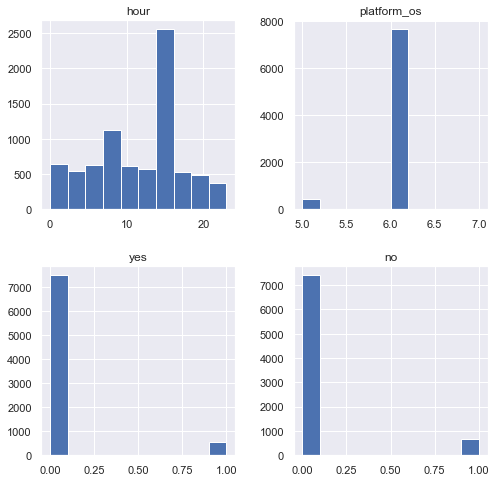

In [56]:
raw_data.select_dtypes(include=['float64','int64']).hist(figsize=(8,8));

count unique values for each categorical column 

In [57]:
raw_data.select_dtypes(include='object').describe(include='all').loc['unique',:]

auction_id     8077
experiment        2
device_make     270
browser          15
Name: unique, dtype: object

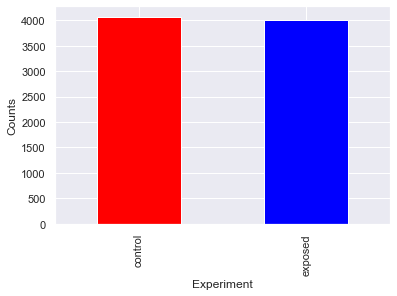

In [62]:
colors=["red",'blue']
raw_data['experiment'].value_counts().plot(kind='bar',color=colors)
plt.xlabel('Experiment')
plt.ylabel('Counts');

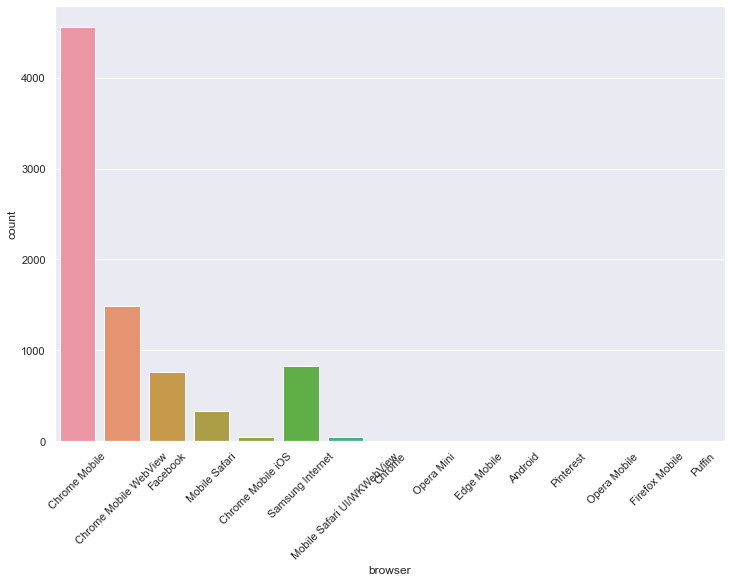

In [70]:
plt.figure(figsize=(12,8))
sns.countplot(data=raw_data,x='browser')
plt.xticks(rotation=45);

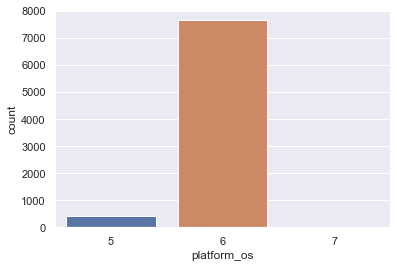

In [86]:
sns.countplot(data=raw_data,x='platform_os');

top engaged device makers 

In [76]:
df_device = pd.DataFrame(raw_data.groupby('device_make').count()['auction_id']).reset_index()

In [83]:
df_device.sort_values(by='auction_id',ascending=False).head(10)

,device_make,auction_id
46,Generic Smartphone,4743
267,iPhone,433
177,Samsung SM-G960F,203
184,Samsung SM-G973F,154
171,Samsung SM-G950F,148
164,Samsung SM-G930F,100
186,Samsung SM-G975F,97
114,Samsung SM-A202F,88
123,Samsung SM-A405FN,87
197,Samsung SM-J330FN,69


In [113]:
conditions = [raw_data.yes == 1 , raw_data.no == 1]
choices = ['yes', 'no']
raw_data['target'] = np.select(conditions, choices, default="None")


In [114]:
raw_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,target
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,None
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,None
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,None
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,None


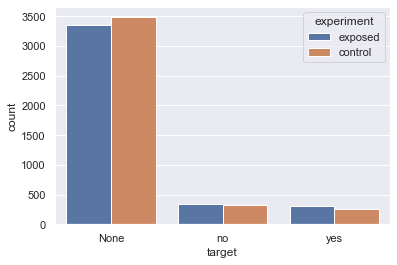

In [115]:
sns.countplot(data=raw_data,x='target',hue='experiment');

In [116]:
df_1_0 = raw_data.query('target=="yes" or target=="no"')

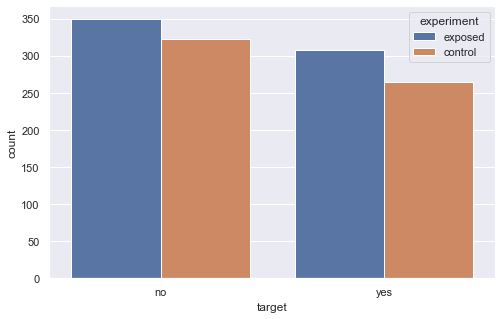

In [117]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_1_0,x='target',hue='experiment');